# Noise levels

_28 August 2021_ <br />
_Chuan-Zheng Lee <czlee@stanford.edu>_ <br />
_Rough working_

This investigates the effect of noise on the CIFAR-10 simple model.

In [1]:
import matplotlib.pyplot as plt
from plotting import plot_averaged_training_charts, make_axes, show_timestamp_info

In [2]:
common_specs = {
    'batch_size':               ('expect', 64),
    'noise':                    ('series', '__all__'),
    'dataset':                  ('title',  'cifar10-simple-flipcrop'),
}
federated_specs = common_specs.copy()
federated_specs.update({
    'script': 'dynpower.py',
    'epochs':                   ('expect', 1),
    'clients':                  ('title',  20),
    'rounds':                   ('expect', 20),
    'ema_coefficient':          ('expect', 1 / 3),
    'save_squared_error':       ('expect', False),
    'send':                     ('expect', 'deltas'),
    'power':                    ('title',  1.0),
    'power_update_period':      ('expect', 1),
    'power_factor':             ('expect', 0.9),
    'power_quantile':           ('expect', 1.0),
    'parameter_radius_initial': ('expect', 1.0),
    'optimizer_client':         ('expect', 'sgd'),
    'lr_client':                ('expect', 0.001),
    'momentum_client':          ('expect', 0.9),
    'weight_decay_client':      ('expect', 0.0),
    'lr_scheduler_client':      ('expect', 'none'),
    'data_per_client':          ('expect', None),
    'clients':                  ('title',  20),
    'client_sync':              ('expect', True),
})

In [3]:
paths = [
    "results/20210826-cifar10-simple-noise-levels/",
]
show_timestamp_info(paths)

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **26 Aug 2021, 18:52:56** | 26 Aug 2021, 18:58:39 | 5 min 43 s |
| last to finish | 28 Aug 2021, 21:24:36 | **28 Aug 2021, 21:30:17** | 5 min 41 s |
| shortest | 27 Aug 2021, 16:59:21 | 27 Aug 2021, 17:04:45 | **5 min 24 s** |
| longest | 28 Aug 2021, 15:23:00 | 28 Aug 2021, 15:28:56 | **5 min 55 s** |


- Skipping 810 runs using 2 other scripts: run.py (540), addnoise.py (270)


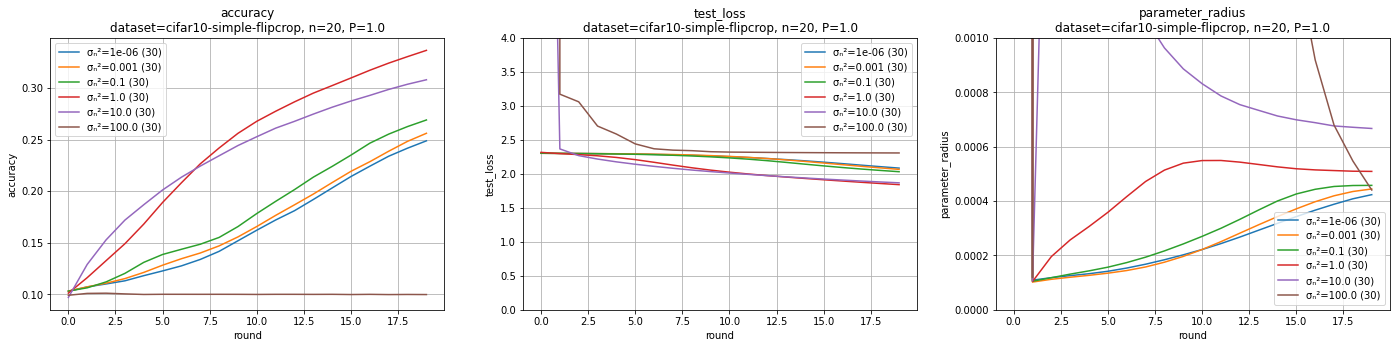

In [4]:
ylims = [None, (0, 4), (0, 0.001)]
plot_averaged_training_charts(paths, ['accuracy', 'test_loss', 'parameter_radius'], federated_specs, ylims=ylims)

In [5]:
simple_specs = common_specs.copy()
simple_specs.update({
    'script': 'addnoise.py',
    'epochs':                   ('expect', 20),
    'optimizer':                ('expect', 'sgd'),
    'learning_rate':            ('expect', 0.001),
    'momentum':                 ('expect', 0.9),
    'weight_decay':             ('expect', 0.0),
    'lr_scheduler':             ('expect', 'none'),
})

- Skipping 720 runs using 2 other scripts: run.py (540), dynpower.py (180)


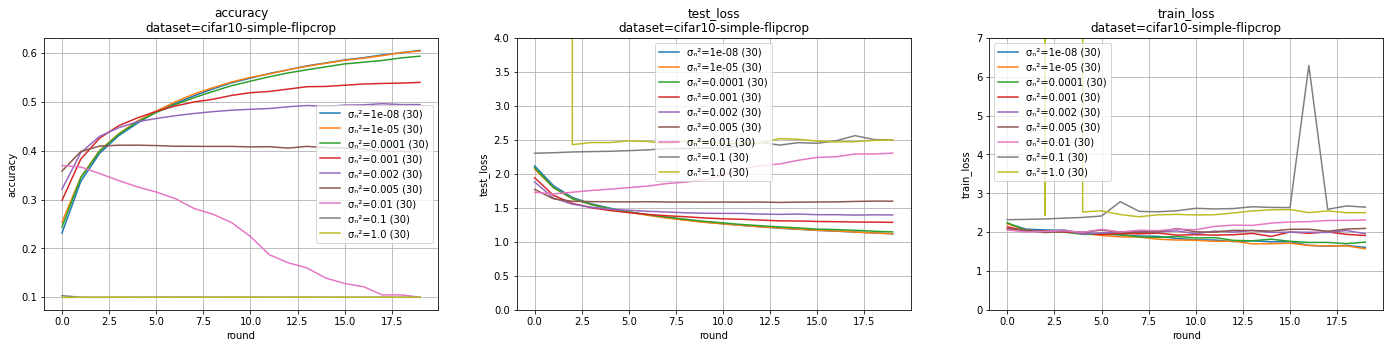

In [6]:
ylims = [None, (0, 4), (0, 7)]
plot_averaged_training_charts(paths, ['accuracy', 'test_loss', 'train_loss'], simple_specs, ylims=ylims)

- Skipping 720 runs using 2 other scripts: run.py (540), dynpower.py (180)
- Skipping 90 runs that don't match on 1 keys: noise (90)


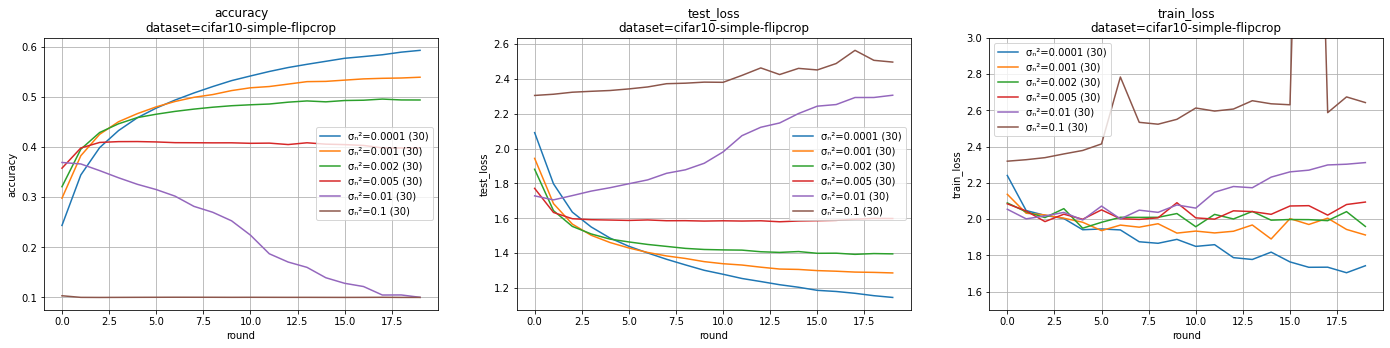

In [7]:
simple_specs['noise'] = ('series', lambda x: x >= 1e-4 and x < 1)
ylims = [None, None, (1.5, 3)]
plot_averaged_training_charts(paths, ['accuracy', 'test_loss', 'train_loss'], simple_specs, ylims=ylims)

In [8]:
fednoise_specs = common_specs.copy()
fednoise_specs.update({
    'script': 'run.py',
    'experiment':               ('filter', 'fednoise'),
    'epochs':                   ('expect', 1),
    'clients':                  ('title',  20),
    'rounds':                   ('expect', 20),
    'save_squared_error':       ('expect', False),
    'send':                     ('expect', 'deltas'),
    'optimizer_client':         ('expect', 'sgd'),
    'lr_client':                ('expect', 0.001),
    'momentum_client':          ('expect', 0.9),
    'weight_decay_client':      ('expect', 0.0),
    'lr_scheduler_client':      ('expect', 'none'),
    'data_per_client':          ('expect', None),
    'clients':                  ('title',  20),
    'client_sync':              ('expect', True),
})

- Skipping 450 runs using 2 other scripts: addnoise.py (270), dynpower.py (180)
- Skipping 270 runs that don't match on 1 keys: clients (270)


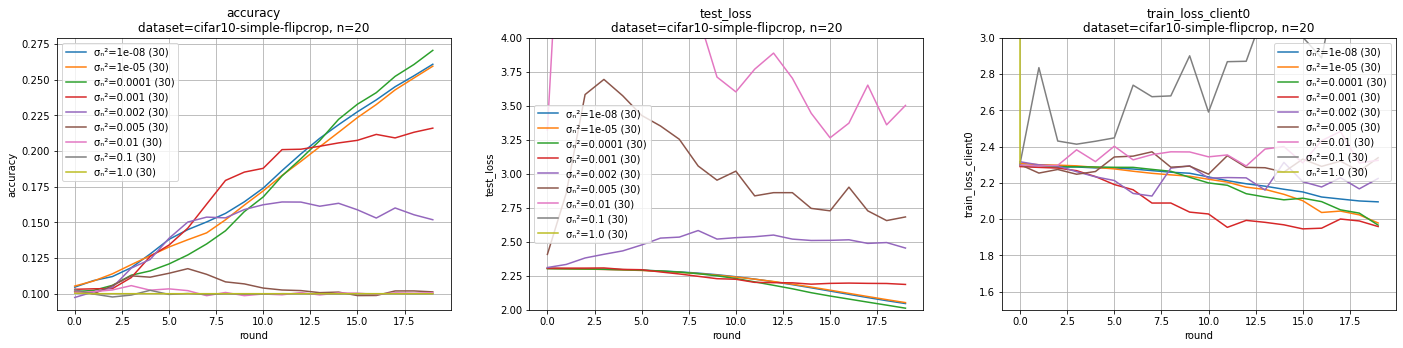

In [9]:
ylims = [None, (2, 4), (1.5, 3)]
plot_averaged_training_charts(paths, ['accuracy', 'test_loss', 'train_loss_client0'], fednoise_specs, ylims=ylims)